In [30]:
#TODO: Dodati mere kvaliteta
#      Da li je GridSearchCV dobro odradjen?
#      GridSearchCV uporediti sa successive halving
#      Cuvanje modela za kasnije uporedjivanje sa ostalim prisupima?
#      Feature selection

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pprint import pprint as print
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
%store -r X
%store -r Y

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
%store X_train
%store X_test
%store Y_train
%store Y_test

Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'Y_train' (list)
Stored 'Y_test' (list)


In [16]:
def print_confusion_matrix(model, X, Y, text):
    Y_pred = model.predict(X)
    print(f'Confusion matrix for {text} set:')
    print(pd.DataFrame(confusion_matrix(Y, Y_pred), columns=['N', 'P'], index=['N', 'P']))

In [17]:
dtc = DecisionTreeClassifier()
features = X.columns

In [18]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

Text(0.5, 1.0, 'Decision tree of depth 39 with 4633 nodes')

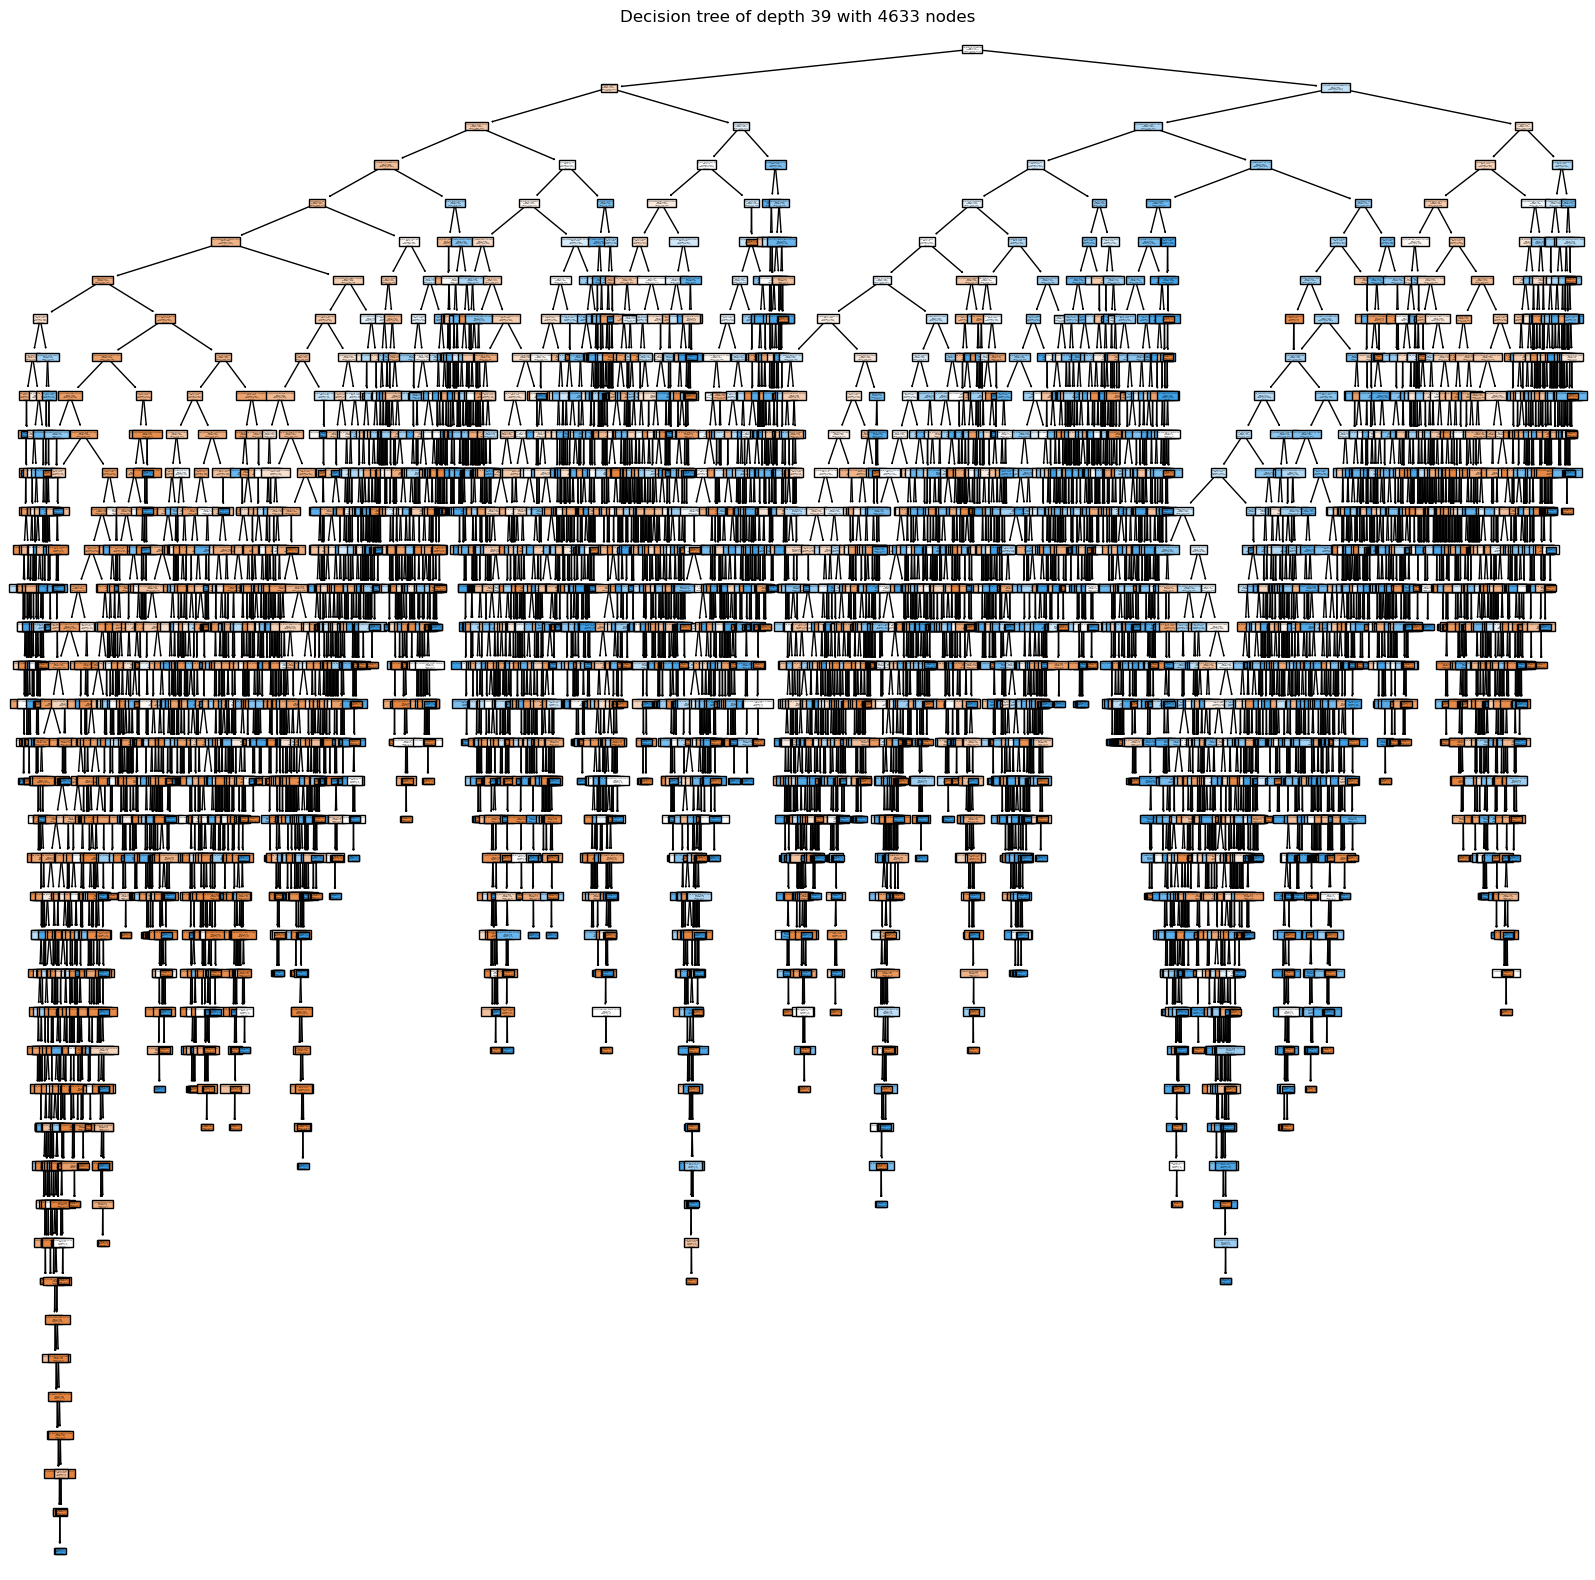

In [19]:
plt.figure(figsize=(20, 20))
plot_tree(dtc, class_names = ['N', 'P'], feature_names = features, filled = True)
plt.title(f"Decision tree of depth {dtc.get_depth()} with {dtc.get_n_leaves()} nodes")

In [20]:
print(f"Parameters of model {type(dtc).__name__}")
for k, v in dtc.get_params().items():
    print(f"{k} : {v}")

print("------------------------------------")
print_confusion_matrix(dtc, X_train, Y_train, 'training')

'Parameters of model DecisionTreeClassifier'
'ccp_alpha : 0.0'
'class_weight : None'
'criterion : gini'
'max_depth : None'
'max_features : None'
'max_leaf_nodes : None'
'min_impurity_decrease : 0.0'
'min_samples_leaf : 1'
'min_samples_split : 2'
'min_weight_fraction_leaf : 0.0'
'random_state : None'
'splitter : best'
'------------------------------------'
'Confusion matrix for training set:'
       N      P
N  14014      0
P      0  13736


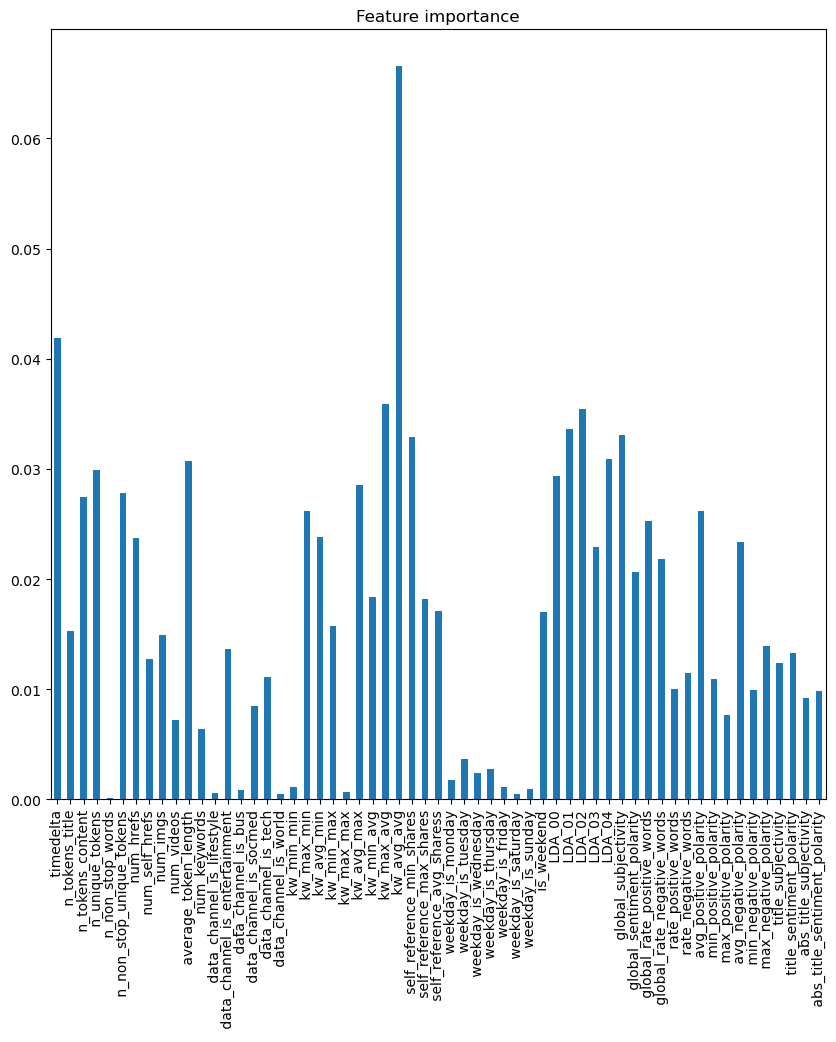

In [21]:
plt.figure(figsize=(10, 10))
pd.Series(dtc.feature_importances_, index = features).plot.bar()
plt.title("Feature importance")
plt.show()

In [22]:
print_confusion_matrix(dtc, X_test, Y_test, 'test')

'Confusion matrix for test set:'
      N     P
N  3513  2555
P  2486  3340


In [23]:
params = {
          'criterion': ['gini', 'entropy'],
          'max_depth': [20, 25, 30, 35, 40],
          'max_features': ['log2', 'sqrt', None]
}
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 3)

In [24]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 25, 30, 35, 40],
                         'max_features': ['log2', 'sqrt', None]})

In [25]:
print(estimator.best_params_)
print(estimator.best_score_)

{'criterion': 'entropy', 'max_depth': 20, 'max_features': None}
0.5875675675675676


In [26]:
print_confusion_matrix(estimator, X_test, Y_test, 'test')

'Confusion matrix for test set:'
      N     P
N  3661  2407
P  2436  3390


In [27]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [28]:
print_confusion_matrix(random_forest, X_train, Y_train, 'training')
print('-------------------------')
print_confusion_matrix(random_forest, X_test, Y_test, 'test')

'Confusion matrix for training set:'
       N      P
N  14014      0
P      0  13736
'-------------------------'
'Confusion matrix for test set:'
      N     P
N  4032  2036
P  2024  3802


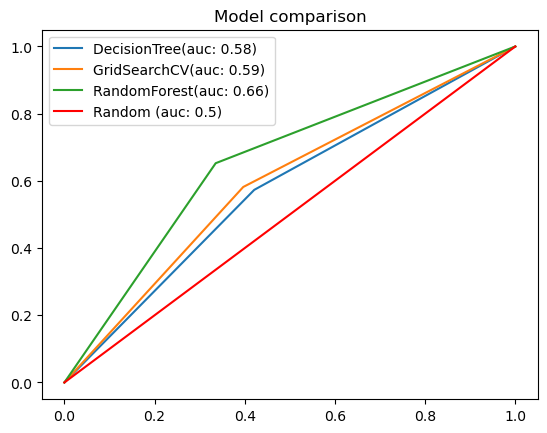

In [29]:
#TODO: REFACTOR, uzeto sa vezbi
models = [dtc, estimator.best_estimator_, random_forest]
model_names = ['DecisionTree', 'GridSearchCV', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()